In [2]:
import os
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<h2> Question 1.1 </h2>
Plotting the pong training curve with simple q-learning.

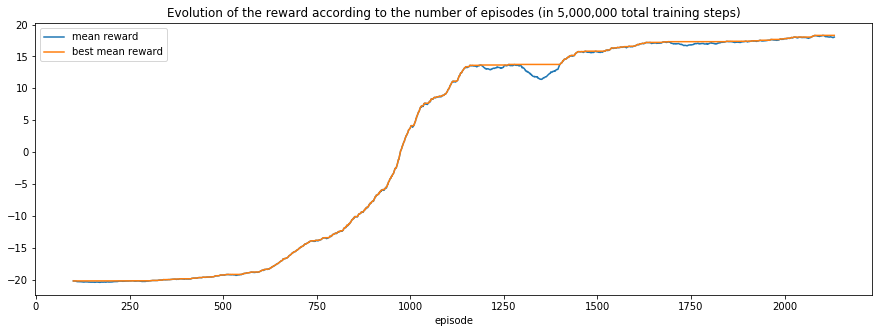

In [58]:
# Get data
with open("pong_simple_buffer_1000000/cf6bc81e-d269-485e-b041-b32a3a4d4837.pkl", 'rb') as f:
    data = pickle.load(f)

# Extract metrics
fig = plt.figure(figsize=(15, 5))
mean_reward = [sum(data[i+1-100:i+1])/100 for i in range(100, len(data))]
best_mean_reward = [max(mean_reward[:i+1]) for i in range(0, len(mean_reward))]
episodes = np.linspace(100, 100 + len(mean_reward), len(mean_reward))

# Plot
plt.plot(episodes, mean_reward, label="mean reward")
plt.plot(episodes, best_mean_reward, label="best mean reward")
plt.xlabel("episode")
plt.legend()
plt.title("Evolution of the reward according to the number of episodes (in 5,000,000 total training steps)")
None

fig.savefig("figures/pong_training.png")

<h2> Question 1.2 and 1.3 </h2>
Plotting double q-learning learning curves on lunar lander with different buffer sizes.

In [3]:
def load_data(file_name):
    mean_rewards = []
    best_mean_rewards = []
    timesteps = []
    with open(file_name, 'rb') as f:
        while True:
            try:
                data = pickle.load(f)
                mean_rewards.append(data["mean_reward"])
                best_mean_rewards.append(data["best_mean_reward"])
                timesteps.append(data["timestep"])
            except EOFError:
                break
    
    df = pd.DataFrame()
    df["mean_rewards"] = mean_rewards
    df["best_mean_rewards"] = best_mean_rewards
    df["timesteps"] = timesteps
    df = df.set_index('timesteps')
    return df

def plot_data(df, title):
    fig = plt.figure(figsize=(15, 5))
    sns.lineplot(data=df)
    plt.ylabel("rewards")
    plt.title(title)
    return fig

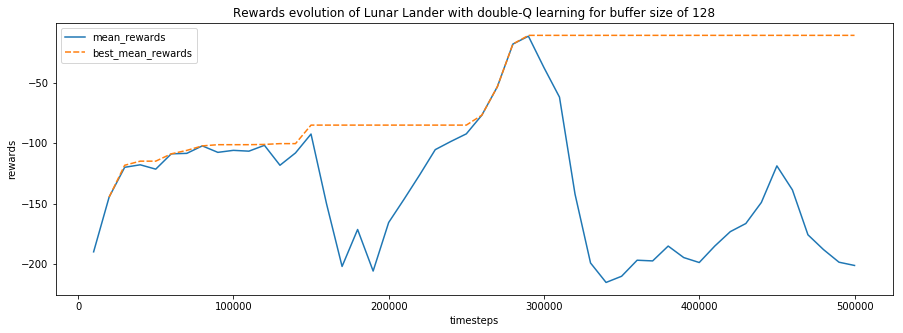

In [80]:
df = load_data("lander_double_Q/lander_buffer_128.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 128")
fig.savefig("figures/lunar_128.png", bbox_inches='tight')
None

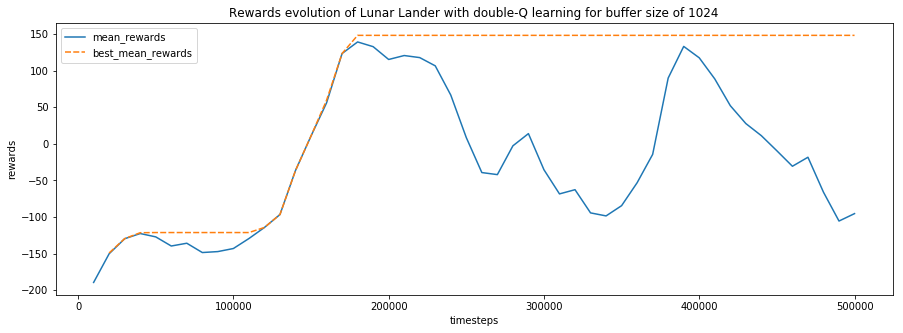

In [79]:
df = load_data("lander_double_Q/lander_buffer_1024.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 1024")
fig.savefig("figures/lunar_1024.png", bbox_inches='tight')
None

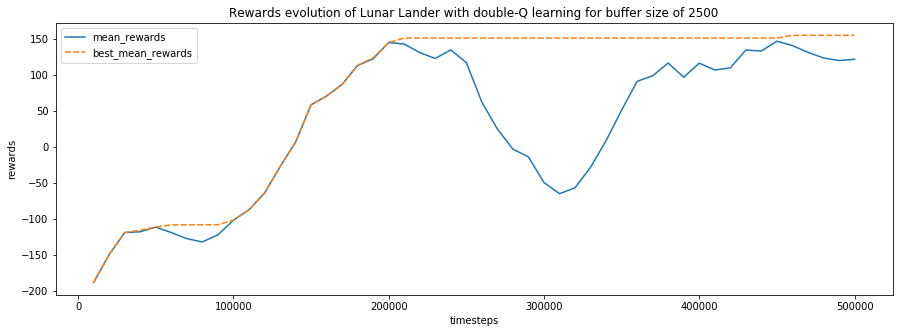

In [78]:
df = load_data("lander_double_Q/lander_buffer_2500.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 2500")
fig.savefig("figures/lunar_2500.png", bbox_inches='tight')
None

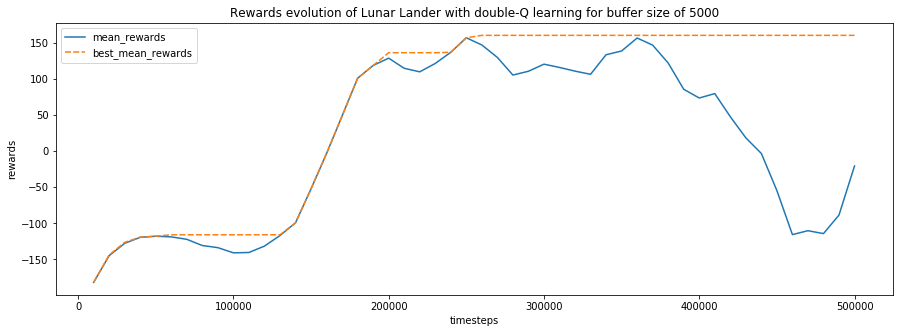

In [77]:
df = load_data("lander_double_Q/lander_buffer_5000.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 5000")
fig.savefig("figures/lunar_5000.png", bbox_inches='tight')
None

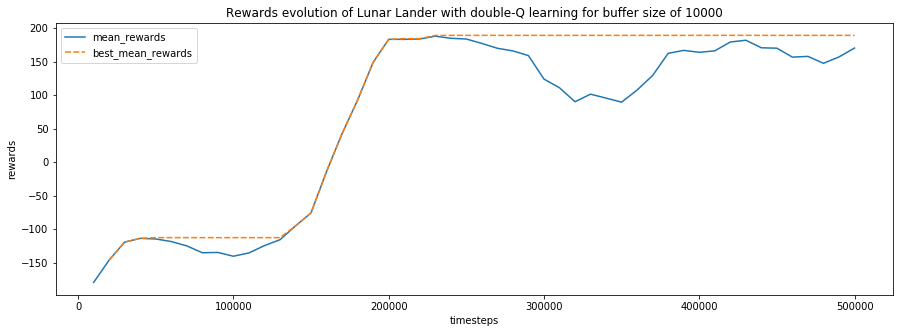

In [76]:
df = load_data("lander_double_Q/lander_buffer_10000.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 10000")
fig.savefig('figures/lunar_10000.png', bbox_inches='tight')
None

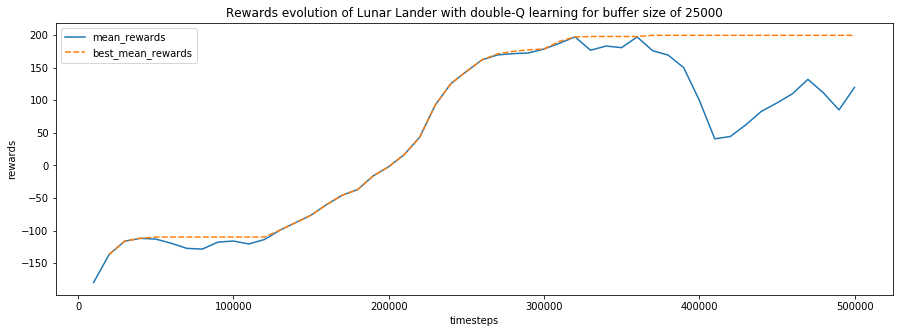

In [75]:
df = load_data("lander_double_Q/lander_buffer_25000.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 25000")
fig.savefig('figures/lunar_25000.png', bbox_inches='tight')
None

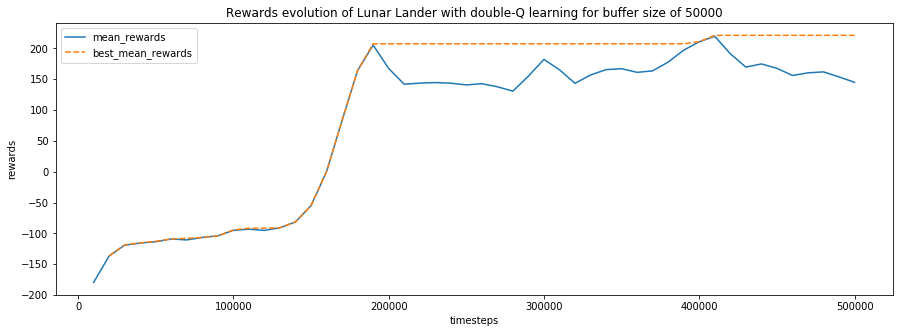

In [74]:
df = load_data("lander_double_Q/lander_buffer_50000.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 50000")
fig.savefig('figures/lunar_50000.png', bbox_inches='tight')
None

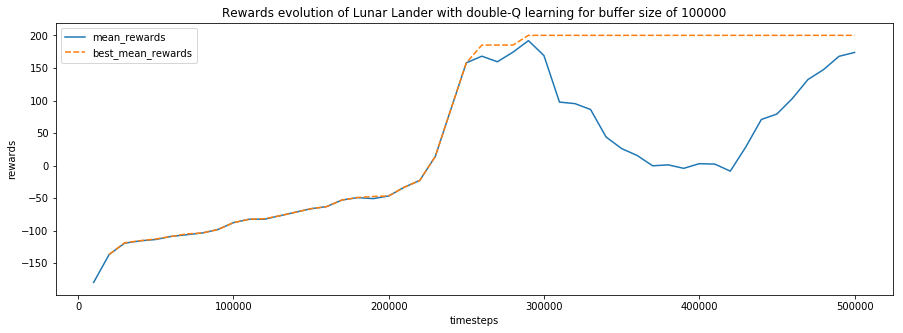

In [73]:
df = load_data("lander_double_Q/lander_buffer_100000.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 100000")
fig.savefig('figures/lunar_100000.png', bbox_inches='tight')
None

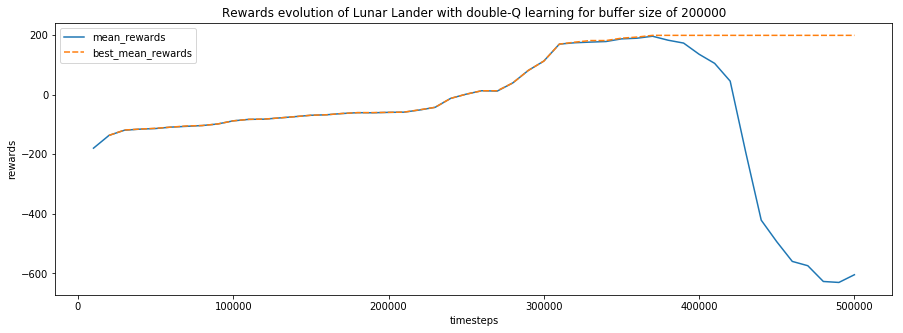

In [72]:
df = load_data("lander_double_Q/lander_buffer_200000.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 200000")
fig.savefig('figures/lunar_200000.png', bbox_inches='tight')
None

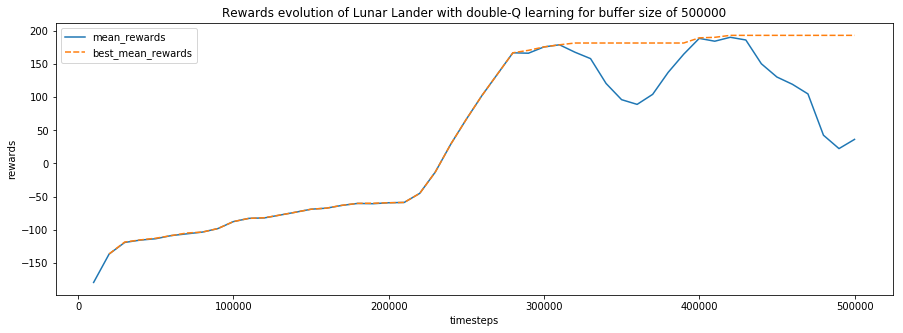

In [71]:
df = load_data("lander_double_Q/lander_buffer_500000.pkl")
fig = plot_data(df, "Rewards evolution of Lunar Lander with double-Q learning for buffer size of 500000")
fig.savefig('figures/lunar_500000.png', bbox_inches='tight')
None

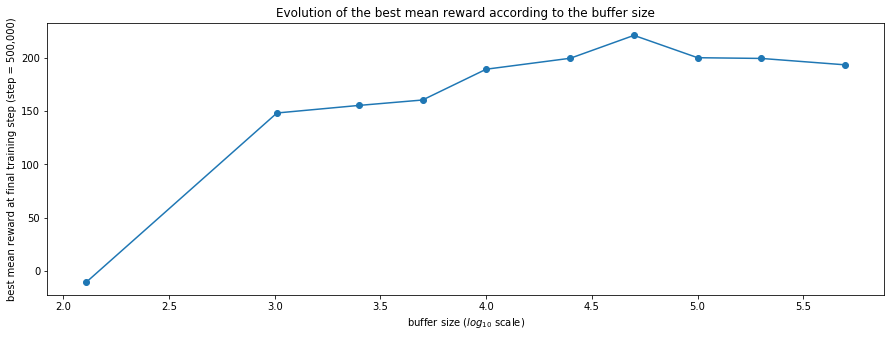

In [103]:
list_buffer_size = [128, 1024, 2500, 5000, 10000, 25000, 50000, 100000, 200000, 500000]
list_best_mean_rewards = []
for buffer_size in list_buffer_size:
    df = load_data("lander_double_Q/lander_buffer_{}.pkl".format(buffer_size))
    list_best_mean_rewards.append(df["best_mean_rewards"].values[-1])

fig = plt.figure(figsize=(15, 5))
plt.scatter(np.log(list_buffer_size)/np.log(10), list_best_mean_rewards)
plt.plot(np.log(list_buffer_size)/np.log(10), list_best_mean_rewards)
plt.xlabel("buffer size ($log_{10}$ scale)")
plt.ylabel("best mean reward at final training step (step = 500,000)")
plt.title("Evolution of the best mean reward according to the buffer size")
fig.savefig('figures/lunar_buffer_evolution.png', bbox_inches='tight')